# Makine Öğrenmesi - Doğrusal Regresyon Modelleri

## Basit Doğrusal Regresyon 

### Model

In [41]:
import numpy as np
import pandas as pd
df = pd.read_csv("./Advertising.csv")
df = df.iloc[:,1:len(df)]
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


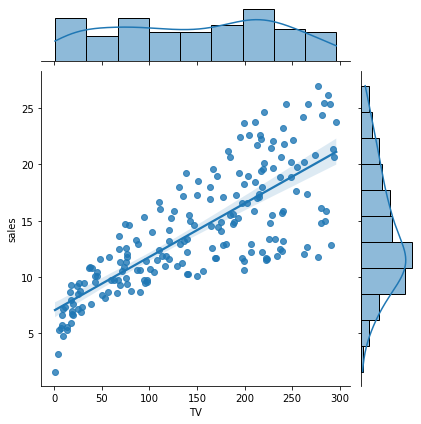

In [7]:
import seaborn as sns
sns.jointplot(x = "TV", y = "sales", data = df, kind = "reg");

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
X = df[["TV"]]

In [10]:
X.head()

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [11]:
y = df[["sales"]]

In [12]:
reg = LinearRegression()

In [13]:
model = reg.fit(X, y)

In [14]:
model

LinearRegression()

In [15]:
str(model)

'LinearRegression()'

In [16]:
dir(model)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_n_features',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_preprocess_data',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_residues',
 '_set_intercept',
 '_validate_data',
 'coef_',
 'copy_X',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'n_features_in_',
 'n_jobs',
 'normalize',
 'positive',
 'predict',
 'rank_',
 'score',
 'set_params',
 'singular_']

In [17]:
model.intercept_

array([7.03259355])

In [18]:
model.coef_

array([[0.04753664]])

In [19]:
#rkare
model.score(X,y)

0.611875050850071

### Tahmin

C:\Users\ANILERMAN\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


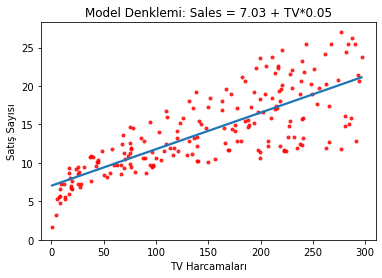

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
g = sns.regplot(df["TV"], df["sales"], ci=None, scatter_kws={'color':'r', 's':9})
g.set_title("Model Denklemi: Sales = 7.03 + TV*0.05")
g.set_ylabel("Satış Sayısı")
g.set_xlabel("TV Harcamaları")
plt.xlim(-10,310)
plt.ylim(bottom=0);

Sales = 7.03 + 0.05*TV

In [21]:
model.intercept_ + model.coef_*165

array([[14.87613922]])

In [26]:
model.predict([[165]])

array([[14.87613922]])

In [27]:
yeni_veri = [[5],[15],[30]]

In [28]:
model.predict(yeni_veri)

array([[7.27027675],
       [7.74564316],
       [8.45869276]])

## Artıklar ve Makine Öğrenmesindeki Önemi

**MSE: Hata Kareler Ortalaması**

**RMSE: Hata Kareler Ortalamasının Karekökü**

In [29]:
y.head()

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [30]:
model.predict(X)[0:6]

array([[17.97077451],
       [ 9.14797405],
       [ 7.85022376],
       [14.23439457],
       [15.62721814],
       [ 7.44616232]])

In [31]:
gercek_y = y[0:10]

In [32]:
tahmin_edilen_y = pd.DataFrame(model.predict(X)[0:10])

In [33]:
hatalar = pd.concat([gercek_y, tahmin_edilen_y], axis = 1)

In [34]:
hatalar.columns = ["gercek_y","tahmin_edilen_y"]

In [35]:
hatalar

,gercek_y,tahmin_edilen_y
0,22.1,17.970775
1,10.4,9.147974
2,9.3,7.850224
3,18.5,14.234395
4,12.9,15.627218
5,7.2,7.446162
6,11.8,9.765950
7,13.2,12.746498
8,4.8,7.441409
9,10.6,16.530414


In [36]:
hatalar["hata"] = hatalar["gercek_y"] - hatalar["tahmin_edilen_y"]

In [37]:
hatalar

,gercek_y,tahmin_edilen_y,hata
0,22.1,17.970775,4.129225
1,10.4,9.147974,1.252026
2,9.3,7.850224,1.449776
3,18.5,14.234395,4.265605
4,12.9,15.627218,-2.727218
5,7.2,7.446162,-0.246162
6,11.8,9.765950,2.034050
7,13.2,12.746498,0.453502
8,4.8,7.441409,-2.641409
9,10.6,16.530414,-5.930414


In [38]:
hatalar["hata_kareler"] = hatalar["hata"]**2

In [39]:
hatalar

,gercek_y,tahmin_edilen_y,hata,hata_kareler
0,22.1,17.970775,4.129225,17.050503
1,10.4,9.147974,1.252026,1.567569
2,9.3,7.850224,1.449776,2.101851
3,18.5,14.234395,4.265605,18.195390
4,12.9,15.627218,-2.727218,7.437719
5,7.2,7.446162,-0.246162,0.060596
6,11.8,9.765950,2.034050,4.137358
7,13.2,12.746498,0.453502,0.205664
8,4.8,7.441409,-2.641409,6.977040
9,10.6,16.530414,-5.930414,35.169814


In [42]:
np.mean(hatalar["hata_kareler"])

9.290350329638105

## Çoklu Doğrusal Regresyon

### Model

In [43]:
#http://faculty.marshall.usc.edu/gareth-james/ISL/data.html
import pandas as pd
df = pd.read_csv("./Advertising.csv")
df = df.iloc[:,1:len(df)]
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [44]:
X = df.drop('sales', axis=1)
y = df[["sales"]]

In [45]:
y.head()

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [46]:
X.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [47]:
#Statsmodels ile model kurmak

In [49]:
import statsmodels.api as sm

In [50]:
lm = sm.OLS(y, X)

In [51]:
model = lm.fit()

In [52]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  sales   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                              3566.
Date:                Tue, 02 Nov 2021   Prob (F-statistic):                   2.43e-171
Time:                        02:02:46   Log-Likelihood:                         -423.54
No. Observations:                 200   AIC:                                      853.1
Df Residuals:                     197   BIC:                                      863.0
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0538      0.001     40.507      0.000       0.051       0.056
radio          0.2222      0.009     23.595      0.000       0.204       0.241
newspaper      0.0168      0.007      2.517      0.013       0.004       0.030
==============================================================================
Omnibus:                        5.982   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.050   Jarque-Bera (JB):                7.039
Skew:                          -0.232   Prob(JB):                       0.0296
Kurtosis:                       3.794   Cond. No.                         12.6
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
##scikit learn ile model kurmak

In [54]:
from sklearn.linear_model import LinearRegression
lm  = LinearRegression()

In [55]:
model = lm.fit(X, y)

In [56]:
model.intercept_

array([2.93888937])

In [57]:
model.coef_

array([[ 0.04576465,  0.18853002, -0.00103749]])

## Tahmin

**Sales = 2.94 + TV * 0.04 + radio * 0.19 - newspaper * 0.001**

30 birim TV, 10 birim radio, 40 birim gazete 

In [58]:
2.94 + 30 * 0.04 + 10 * 0.19 - 40 * 0.001

5.999999999999999

In [59]:
yeni_veri = [[300],[120],[400]]

In [60]:
import pandas as pd
yeni_veri = pd.DataFrame(yeni_veri).T

In [61]:
yeni_veri

,0,1,2
0,300,120,400


In [62]:
model.predict(yeni_veri)

array([[38.87688782]])

In [63]:
from sklearn.metrics import mean_squared_error

In [64]:
y.head()

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [65]:
model.predict(X)[0:10]

array([[20.52397441],
       [12.33785482],
       [12.30767078],
       [17.59782951],
       [13.18867186],
       [12.47834763],
       [11.72975995],
       [12.12295317],
       [ 3.72734086],
       [12.55084872]])

In [66]:
MSE = mean_squared_error(y, model.predict(X))
MSE

2.784126314510936

In [67]:
import numpy as np
RMSE = np.sqrt(MSE)
RMSE

1.6685701407225697

### Model Tuning (Model Doğrulama)

In [68]:
X.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [69]:
y.head()

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [70]:
#sinama seti
from sklearn.model_selection import train_test_split

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1)

In [72]:
X_train.head()

,TV,radio,newspaper
108,13.1,0.4,25.6
107,90.4,0.3,23.2
189,18.7,12.1,23.4
14,204.1,32.9,46.0
56,7.3,28.1,41.4


In [73]:
y_train.head()

,sales
108,5.3
107,8.7
189,6.7
14,19.0
56,5.5


In [74]:
X_test.head()

,TV,radio,newspaper
58,210.8,49.6,37.7
40,202.5,22.3,31.6
34,95.7,1.4,7.4
102,280.2,10.1,21.4
184,253.8,21.3,30.0


In [75]:
y_test.head()

,sales
58,23.8
40,16.6
34,9.5
102,14.8
184,17.6


In [76]:
lm = LinearRegression()
model = lm.fit(X_train, y_train)

In [77]:
#egitim hatasi
np.sqrt(mean_squared_error(y_train, model.predict(X_train)))

1.736902590147092

In [78]:
#test hatasi
np.sqrt(mean_squared_error(y_test, model.predict(X_test)))

1.4113417558581585

In [79]:
#k-katlı cv

In [80]:
from sklearn.model_selection import cross_val_score

In [88]:
cross_val_score(model, X_train, y_train, cv = 10, scoring = "neg_mean_squared_error")

array([-1.62375953, -3.81875608, -3.43828142, -2.27748673, -7.25325414,
       -1.88303708, -2.80517715, -3.68594486, -1.12810834, -3.96330989])

In [89]:
#cv mse
np.mean(-cross_val_score(model, X_train, y_train, cv = 10, scoring = "neg_mean_squared_error"))

3.187711520944358

In [90]:
#cv rmse
np.sqrt(np.mean(-cross_val_score(model, X_train, y_train, cv = 10, scoring = "neg_mean_squared_error")))

1.7854163438661466

In [91]:
#cv rmse
np.sqrt(np.mean(-cross_val_score(model, X, y, cv = 10, scoring = "neg_mean_squared_error")))

1.749276312684338

# Ridge Regresyon

### Gerekli Kütüphaneler

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV

### Veri Seti

In [ ]:
df = pd.read_csv("./dogRegMod/Hitters.csv")

df = df.dropna()

dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])

y = df["Salary"]

X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')

X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
ridge_model = Ridge(alpha = 5).fit(X_train, y_train)

In [ ]:
ridge_model

In [ ]:
ridge_model.coef_

In [ ]:
ridge_model.intercept_

In [ ]:
np.linspace(10,-2,100)

In [ ]:
lambdalar = 10**np.linspace(10,-2,100)*0.5

In [ ]:
lambdalar

In [ ]:
ridge_model = Ridge()
katsayilar = []

for i in lambdalar:
    ridge_model.set_params(alpha = i)
    ridge_model.fit(X_train, y_train)
    katsayilar.append(ridge_model.coef_)
    

In [ ]:
katsayilar

In [ ]:
ax = plt.gca()
ax.plot(lambdalar, katsayilar) 
ax.set_xscale("log")

## Tahmin

In [ ]:
ridge_model = Ridge().fit(X_train, y_train)

In [ ]:
y_pred = ridge_model.predict(X_train)

In [ ]:
y_pred[0:10]

In [ ]:
y_train[0:10]

In [ ]:
#train hatası
RMSE = np.sqrt(mean_squared_error(y_train, y_pred))
RMSE

In [ ]:
np.sqrt(np.mean(-cross_val_score(ridge_model, X_train, y_train, cv = 10, scoring = "neg_mean_squared_error")))

In [ ]:
#test hatası
y_pred = ridge_model.predict(X_test)

In [ ]:
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
RMSE

## Model Tuning

**Neden Model Tuning?**

In [ ]:
ridge_model = Ridge(1).fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

In [ ]:
np.random.randint(0,1000,100)

In [ ]:
lambdalar1 = np.random.randint(0,1000,100)

In [ ]:
lambdalar2 = 10**np.linspace(10,-2,100)*0.5

In [ ]:
ridgecv = RidgeCV(alphas = lambdalar1, scoring = "neg_mean_squared_error", cv = 10, normalize = True)
ridgecv.fit(X_train, y_train)

In [ ]:
ridgecv.alpha_

In [ ]:
#final modeli 

In [ ]:
ridge_tuned = Ridge(alpha = ridgecv.alpha_).fit(X_train, y_train)

In [ ]:
y_pred = ridge_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

# Lasso Regresyon

### Gerekli Kütüphaneler

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV, LassoCV

### Veri Seti

In [2]:
df = pd.read_csv("./dogRegMod/Hitters.csv")

df = df.dropna()

dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])

y = df["Salary"]

X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')

X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [3]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [4]:
df.shape

(263, 20)

In [5]:
lasso_model = Lasso().fit(X_train, y_train)

/Users/mvahit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8256653.399850384, tolerance: 3898.686956380658
  positive)


In [6]:
lasso_model

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [7]:
lasso_model.intercept_

-5.587450677335028

In [8]:
lasso_model.coef_

array([-1.74875691e+00,  8.59204135e+00,  6.67993798e+00, -3.06715333e+00,
       -1.91843070e+00,  5.32372890e+00,  8.39184117e+00, -1.63172447e-01,
       -8.22311277e-02, -3.93602861e-01,  1.71118530e+00,  6.55730545e-01,
       -6.48379405e-01,  2.59815358e-01,  2.73041157e-01, -4.41440454e-01,
        8.54474011e+01, -9.59701213e+01, -2.13086605e+01])

In [ ]:
#farklı lambda degerlerine karsilik katsayilar

In [13]:
lasso = Lasso()
coefs = []
alphas = 10**np.linspace(10,-2,100)*0.5
for a in alphas:
    lasso.set_params(alpha = a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)

/Users/mvahit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5469.558741401881, tolerance: 3898.686956380658
  positive)
/Users/mvahit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6540.147679515183, tolerance: 3898.686956380658
  positive)
/Users/mvahit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4001.7561374865472, tolerance: 3898.686956380658
  positive)
/Users/mvahit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase th

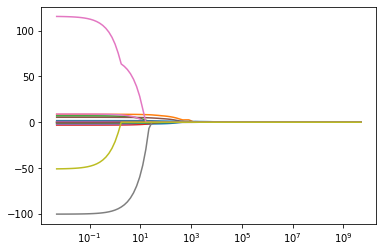

In [14]:
ax = plt.gca()
ax.plot(alphas,coefs)
ax.set_xscale("log")

## Tahmin

In [15]:
lasso_model

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [16]:
lasso_model.predict(X_train)[0:5]

array([377.26270596, 786.51524513, 495.14140718, 117.19492966,
       429.04228506])

In [17]:
lasso_model.predict(X_test)[0:5]

array([ 609.18826367,  696.96810702, 1009.06157391,  412.22773375,
        409.25851712])

In [18]:
y_pred = lasso_model.predict(X_test)

In [19]:
np.sqrt(mean_squared_error(y_test, y_pred))

356.0975884554031

In [20]:
r2_score(y_test, y_pred)

0.41422798132366234

## Model Tuning

In [29]:
alphas = 10**np.linspace(10,-2,100)*0.5

In [30]:
lasso_cv_model = LassoCV(alphas = alphas, cv = 10, max_iter = 100000).fit(X_train, y_train)

In [31]:
lasso_cv_model.alpha_

201.85086292982749

In [32]:
lasso_tuned = Lasso().set_params(alpha = lasso_cv_model.alpha_).fit(X_train, y_train)

In [33]:
lasso_tuned = Lasso(alpha = lasso_cv_model.alpha_).fit(X_train, y_train)

In [34]:
y_pred = lasso_tuned.predict(X_test)

In [35]:
np.sqrt(mean_squared_error(y_test, y_pred))

363.68327080374473

In [36]:
pd.Series(lasso_tuned.coef_, index = X_train.columns)

AtBat         -1.052276
Hits           5.342648
HmRun          0.000000
Runs           0.000000
RBI            0.000000
Walks          2.640006
Years          0.000000
CAtBat        -0.174125
CHits          0.249805
CHmRun        -0.000000
CRuns          1.035075
CRBI           0.469281
CWalks        -0.186771
PutOuts        0.272541
Assists        0.170528
Errors        -0.000000
League_N       0.000000
Division_W    -0.000000
NewLeague_N    0.000000
dtype: float64

# ElasticNet Regresyon Modeli

### Gerekli Kütüphaneler

In [37]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV, LassoCV,ElasticNetCV

### Veri Seti

In [38]:
df = pd.read_csv("./dogRegMod/Hitters.csv")

df = df.dropna()

dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])

y = df["Salary"]

X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')

X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [39]:
enet_model = ElasticNet().fit(X_train, y_train)

/Users/mvahit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8487984.79936731, tolerance: 3898.686956380658
  positive)


In [40]:
enet_model.coef_

array([ -1.86256172,   8.70489065,   5.10426375,  -2.89875799,
        -1.28642985,   5.24343682,   6.04480276,  -0.14701495,
        -0.21566628,  -0.7897201 ,   1.80813117,   0.80914508,
        -0.61262382,   0.26816203,   0.27172387,  -0.36530729,
        19.2186222 , -31.16586592,   8.98369938])

In [41]:
enet_model.intercept_

-6.465955602112672

In [43]:
#tahmin
enet_model.predict(X_train)[0:10]

array([325.74706292, 776.06632333, 522.86508419, 107.64091955,
       449.03139566, 997.76095723,  99.78828622, 311.33763086,
       418.50335021, 879.9502608 ])

In [44]:
enet_model.predict(X_test)[0:10]

array([ 577.79111731,  617.33202224, 1031.39113156,  364.95861575,
        489.51894393,  300.74185842,  604.522666  ,  465.34678732,
        901.44473965,  703.20357123])

In [45]:
y_pred = enet_model.predict(X_test)

In [46]:
np.sqrt(mean_squared_error(y_test, y_pred))

357.1676548181245

In [47]:
r2_score(y_test, y_pred)

0.4107022246932689

## Model Tuning

In [57]:
alphas = 10**np.linspace(10,-2,100)*0.5

In [59]:
enet_cv_model = ElasticNetCV(alphas = alphas, cv = 10).fit(X_train, y_train)

/Users/mvahit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3249.9483078774065, tolerance: 3241.4244490642723
  tol, rng, random, positive)
/Users/mvahit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4337.0031515117735, tolerance: 3241.4244490642723
  tol, rng, random, positive)
/Users/mvahit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5751.424793953076, tolerance: 3241.4244490642723
  tol, rng, random, positive)
/Users/mvahit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning:

In [60]:
enet_cv_model.alpha_

5748.784976988678

In [61]:
enet_cv_model.intercept_

-31.463121225641316

In [62]:
enet_cv_model.coef_

array([ 0.61111381,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.        ,  0.        ,  0.11212622,  0.        ,
        0.25252702,  0.18656722,  0.00444355,  0.30988823,  0.        ,
       -0.        ,  0.        , -0.        ,  0.        ])

In [ ]:
#final modeli

In [63]:
enet_tuned = ElasticNet(alpha = enet_cv_model.alpha_).fit(X_train, y_train)

In [64]:
y_pred = enet_tuned.predict(X_test)

In [65]:
np.sqrt(mean_squared_error(y_test, y_pred))

393.9753065850553

In [56]:
?ElasticNet

Init signature:
ElasticNet(
    alpha=1.0,
    l1_ratio=0.5,
    fit_intercept=True,
    normalize=False,
    precompute=False,
    max_iter=1000,
    copy_X=True,
    tol=0.0001,
    warm_start=False,
    positive=False,
    random_state=None,
    selection='cyclic',
)
Docstring:     
Linear regression with combined L1 and L2 priors as regularizer.

Minimizes the objective function::

        1 / (2 * n_samples) * ||y - Xw||^2_2
        + alpha * l1_ratio * ||w||_1
        + 0.5 * alpha * (1 - l1_ratio) * ||w||^2_2

If you are interested in controlling the L1 and L2 penalty
separately, keep in mind that this is equivalent to::

        a * L1 + b * L2

where::

        alpha = a + b and l1_ratio = a / (a + b)

The parameter l1_ratio corresponds to alpha in the glmnet R package while
alpha corresponds to the lambda parameter in glmnet. Specifically, l1_ratio
= 1 is the lasso penalty. Currently, l1_ratio <= 0.01 is not reliable,
unless you supply your own sequence of alpha.

Read more i